# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [ ]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# 設定 data_path
dir_data = './data/'

In [ ]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [24]:
#1
import os
import numpy as np
import pandas as pd
dir_data = './data/'
f_app = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app)
cut_rule = [0,0.5,2,5,app_train['CNT_CHILDREN'].max()]
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

215371


(-0.001, 0.5]    215371
(0.5, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 19.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [6]:
#2-1
import os
import numpy as np
import pandas as pd
dir_data = './data/'
f_app = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app)
cut_rule = [0,0.5,2,5,app_train['CNT_CHILDREN'].max()]
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
grp = app_train['CNT_CHILDREN_GROUP']
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
print(grouped_df.mean())
target_grp = app_train['TARGET']
target_df = app_train.groupby(target_grp)['AMT_INCOME_TOTAL']
print(target_df.mean())

CNT_CHILDREN_GROUP
(-0.001, 0.5]    166288.713566
(0.5, 2.0]       174725.712648
(2.0, 5.0]       173626.303191
(5.0, 19.0]      147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64
TARGET
0    169077.722266
1    165611.760906
Name: AMT_INCOME_TOTAL, dtype: float64


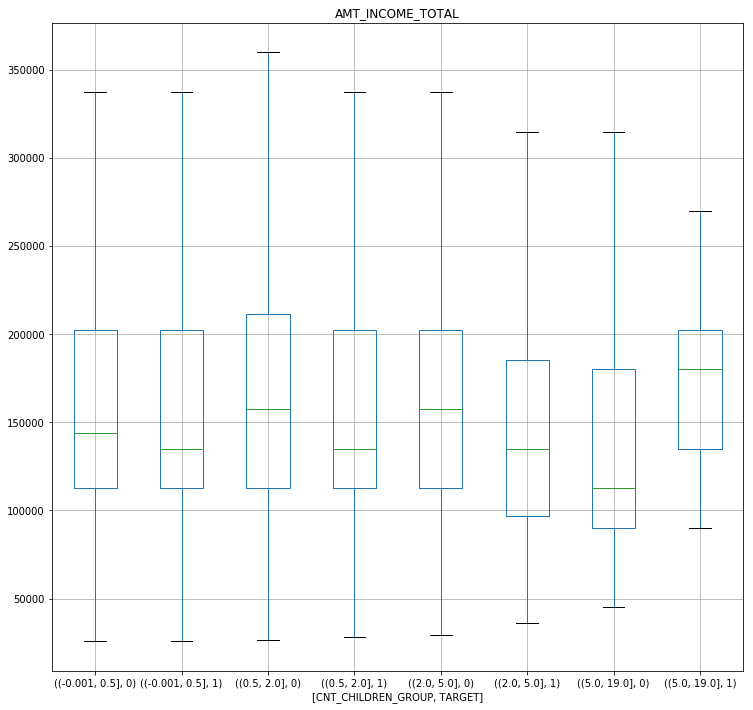

In [12]:
#2-2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dir_data = './data/'
f_app = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app)
cut_rule = [0,0.5,2,5,app_train['CNT_CHILDREN'].max()]
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
grp = app_train['CNT_CHILDREN_GROUP']
# grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
# grouped_df.mean().index
# grp = grouped_df.mean()

plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [36]:
#3
import os
import numpy as np
import pandas as pd
dir_data = './data/'
f_app = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app)
cut_rule = [0,0.5,2,5,app_train['CNT_CHILDREN'].max()]
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
temp = app_train.groupby(['AMT_INCOME_TOTAL'])['CNT_CHILDREN_GROUP']



# help(appgroup['TARGET'] )
# grouped_df = appgroup.apply(lambda x:x['CNT_CHILDREN_GROUP']-x['TARGET'])

# app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = temp.apply(lambda x:(x-np.mean(x))/np.std(x) )

# app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

TypeError: Categorical cannot perform the operation mean